In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('delivery_time.csv')
data.head(21)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.shape

(21, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


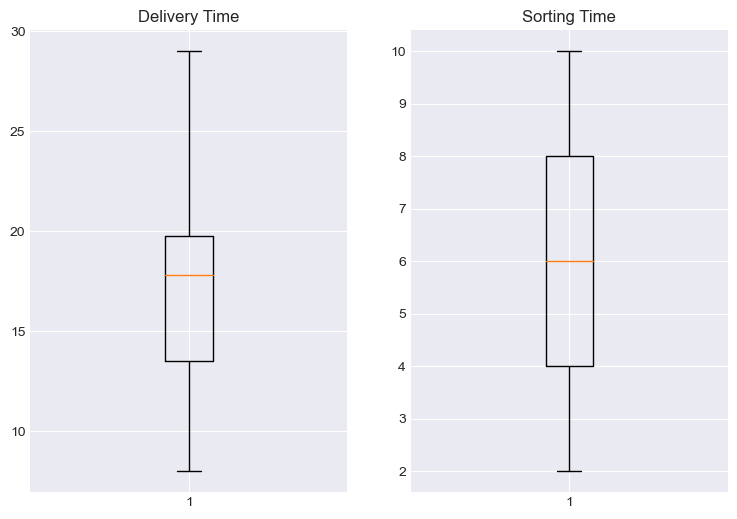

In [27]:
#check for Outliers
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(data['delivery_time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['sorting_time'])
plt.title('Sorting Time')
plt.show()

In [9]:
data.corr() 

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

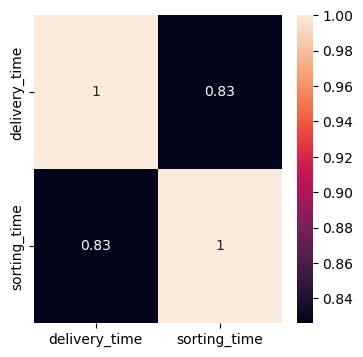

In [10]:
import seaborn as sb
plt.figure(figsize=(4,4))
sb.heatmap(data.corr(),annot=True)

In [11]:
import statsmodels.formula.api as smf

In [12]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        10:47:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Delivery Time')

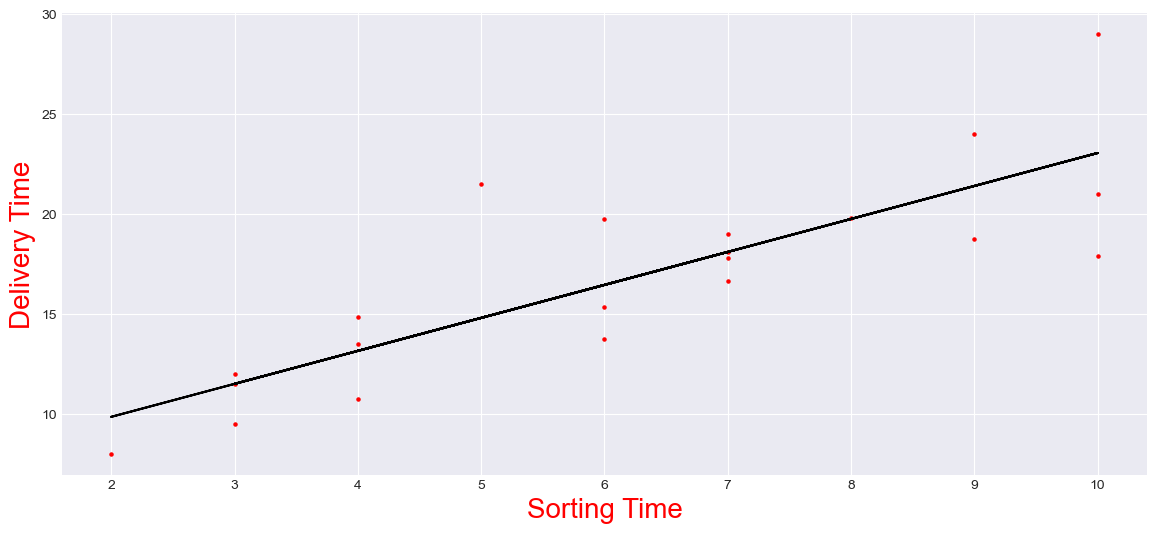

In [14]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["sorting_time"],data["delivery_time"],color="r",s=5)
plt.plot(data["sorting_time"],model.predict(),color="black")


plt.xlabel("Sorting Time",size=20,color="red")
plt.ylabel("Delivery Time",size=20,color="red")


In [15]:
model2=smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        10:47:06   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model2=smf.ols('np.log(delivery_time)~(sorting_time)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 07 Aug 2023   Prob (F-statistic):           1.59e-06
Time:                           10:47:06   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model2=smf.ols('np.log(delivery_time)~sorting_time+pow(sorting_time,2)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Mon, 07 Aug 2023   Prob (F-statistic):           2.20e-06
Time:                           10:47:06   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time             0.2659      0.080      3.315      0.004       0.097       0.434
pow(sorting_time, 2)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2=smf.ols('np.log(delivery_time)~(sorting_time)+pow(sorting_time,2)+pow(sorting_time,3)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.782
Model:                               OLS   Adj. R-squared:                  0.743
Method:                    Least Squares   F-statistic:                     20.31
Date:                   Mon, 07 Aug 2023   Prob (F-statistic):           7.37e-06
Time:                           10:47:06   Log-Likelihood:                 10.748
No. Observations:                     21   AIC:                            -13.50
Df Residuals:                         17   BIC:                            -9.317
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0716      0.591      1.814      0.087      -0.175       2.318
sorting_time             0.6495      0.343      1.896      0.075      -0.073       1.372
pow(sorting_time, 2)    -0.0809      0.059     -1.361      0.191      -0.206       0.045
pow(sorting_time, 3)     0.0036      0.003      1.151      0.266      -0.003       0.010
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.371
Skew:                           0.260   Prob(JB):                        0.831
Kurtosis:                       2.608   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model2.fittedvalues

0     3.112878
1     2.607814
2     2.841557
3     3.015030
4     3.112878
5     2.841557
6     2.901184
7     2.390069
8     3.112878
9     3.015030
10    2.951737
11    2.607814
12    2.901184
13    2.390069
14    2.390069
15    2.607814
16    2.841557
17    2.901184
18    2.075987
19    2.901184
20    2.751038
dtype: float64

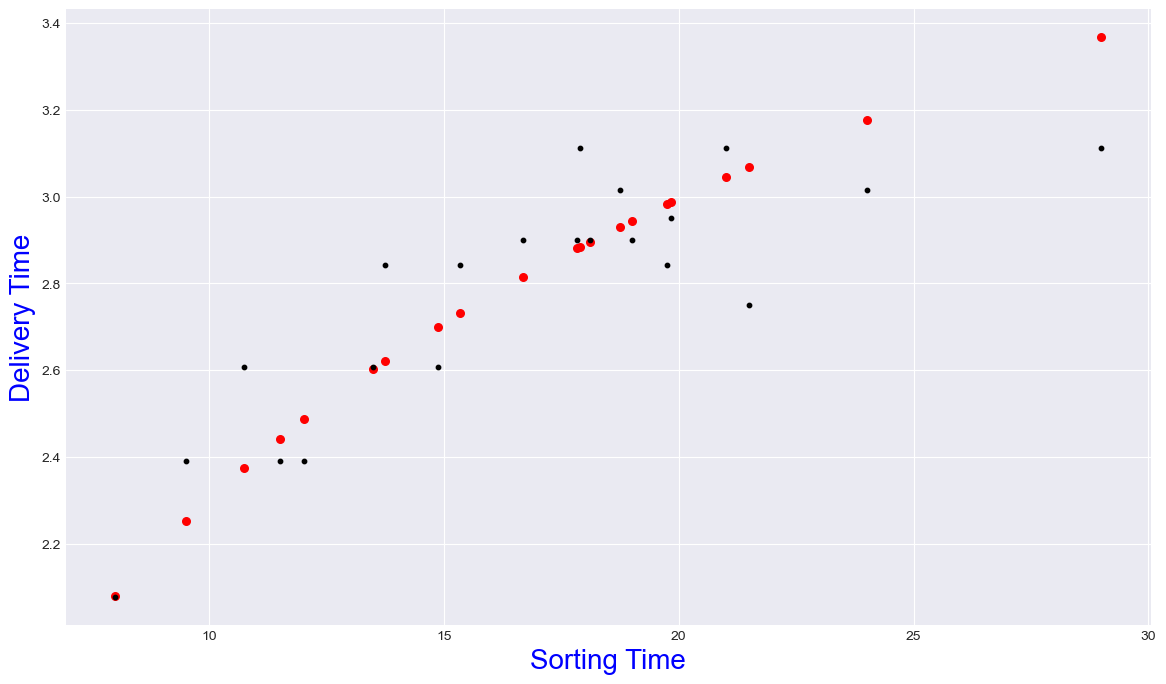

In [20]:
model2=smf.ols('np.log(delivery_time)~(sorting_time)+pow(sorting_time,2)+pow(sorting_time,3)',data=data).fit()
model2.summary()

plt.figure(figsize=(14,8))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["delivery_time"],np.log(data["delivery_time"]),color="red",s=30)
plt.scatter(data["delivery_time"],model2.fittedvalues,color="black",s=10)


plt.xlabel("Sorting Time",size=20,color="b")
plt.ylabel("Delivery Time",size=20,color="b")
plt.show()

In [29]:
X=data.iloc[:,1].values.reshape(-1,1)
y=data.iloc[:,0].values

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=model.predict(X_test)

In [39]:
y_pred

array([13.47340462, 19.57424294, 21.09945252, 10.42298546, 18.04903336,
       11.94819504, 16.52382378])

In [47]:
model.coef_[0]

1.525209580838323

In [50]:
model.intercept_

7.372566295979469

In [49]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean_squared_error: {mse}')
print(f'r2_score: {r2}')

Mean_squared_error: 3.433209111338606
r2_score: 0.857727714266439
